# Rectangular Z2 demo (Energy spectrum and ground-state distributions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
try:
    import jax.numpy as jnp
except ImportError:
    jnp = np
from heavyhex_qft.rectangular_z2 import RectangularZ2Lattice
from heavyhex_qft.utils import subspace_projection

## 2 plaquettes

In [2]:
lattice = RectangularZ2Lattice((3, 2))

### Graph representing the physics lattice

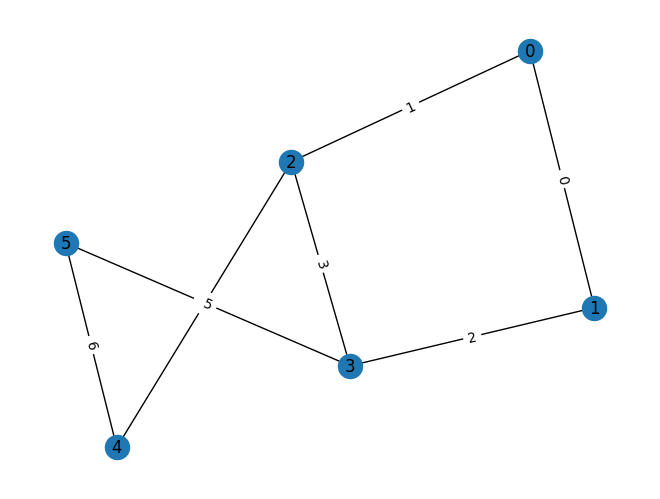

In [3]:
lattice.draw_graph()

### Dual graph of the physics lattice (plaquettes as nodes)

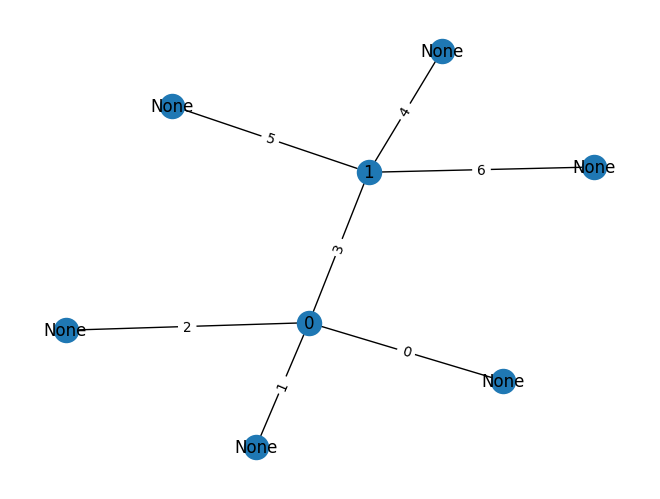

In [4]:
lattice.draw_dual_graph()

### Graph representing the qubit mapping

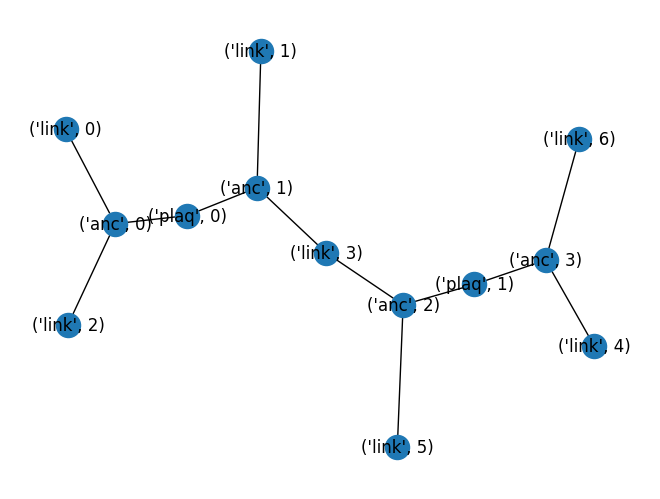

In [5]:
lattice.draw_qubit_graph()

In [6]:
hamiltonian = lattice.make_hamiltonian(0.5)

subspace = lattice.charge_subspace([0] * lattice.num_vertices)
subspace_hamiltonian = subspace_projection(hamiltonian, subspace)
evals, evecs = np.linalg.eigh(subspace_hamiltonian)

Text(0, 0.5, 'Energy eigenvalue')

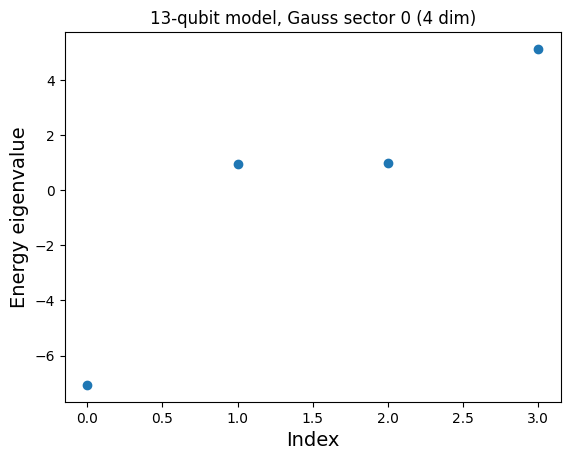

In [7]:
plt.scatter(np.arange(evals.shape[0]), evals)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 0 ({len(subspace)} dim)')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Energy eigenvalue', fontsize=14)

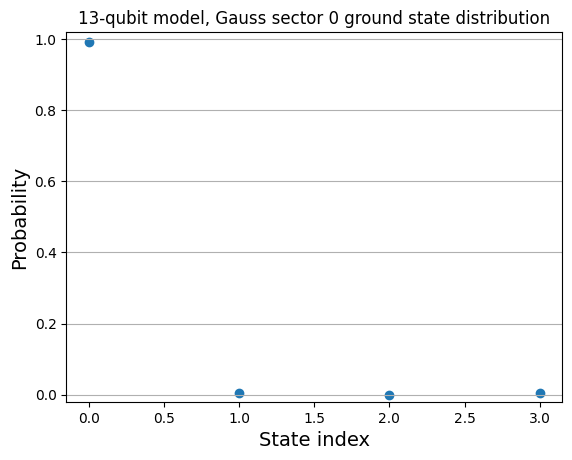

In [8]:
plt.scatter(np.arange(evals.shape[0]), np.square(np.abs(evecs[:, 0])))
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 0 ground state distribution')
plt.xlabel('State index', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

## 4 plaquettes, Gauss sector 0

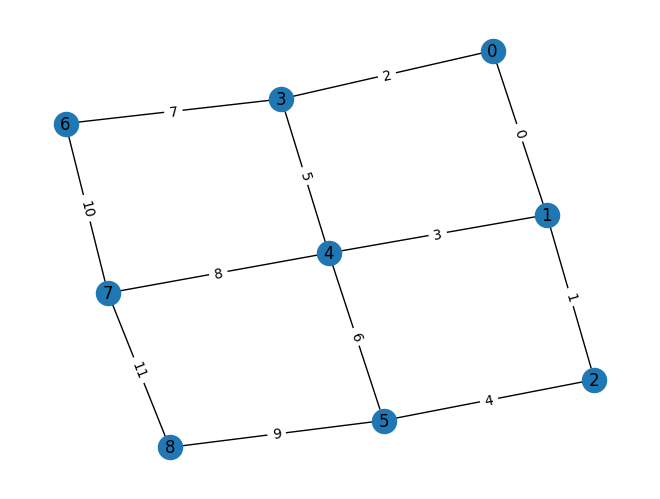

In [9]:
lattice = RectangularZ2Lattice((3, 3))

lattice.draw_graph()

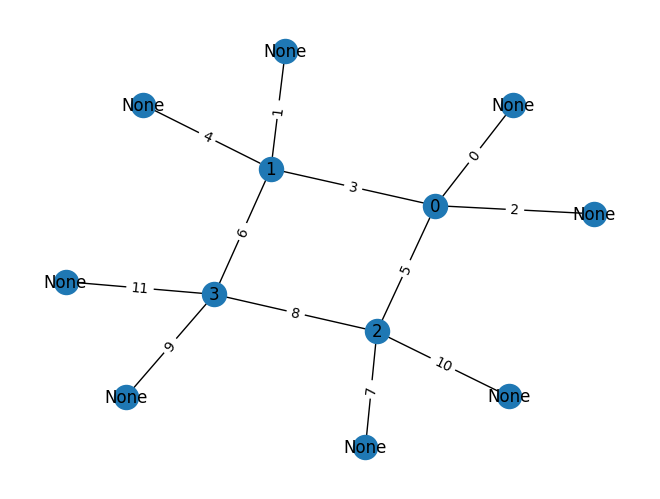

In [10]:
lattice.draw_dual_graph()

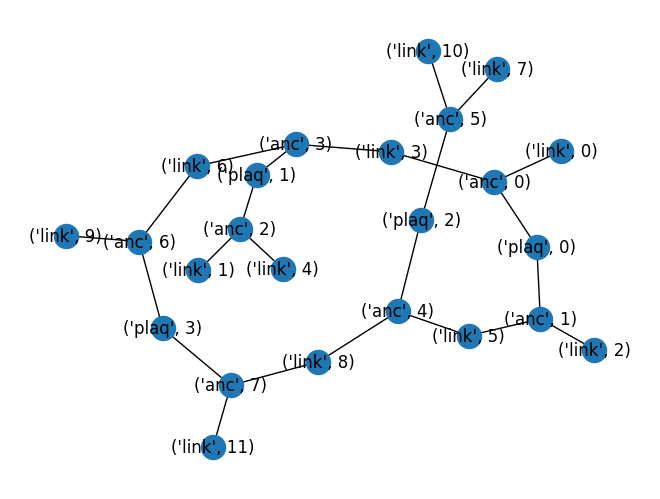

In [11]:
lattice.draw_qubit_graph()

In [12]:
hamiltonian = lattice.make_hamiltonian(0.5)

subspace = lattice.charge_subspace([0] * lattice.num_vertices)
subspace_hamiltonian = subspace_projection(hamiltonian, subspace)
evals, evecs = np.linalg.eigh(subspace_hamiltonian)

Text(0, 0.5, 'Energy eigenvalue')

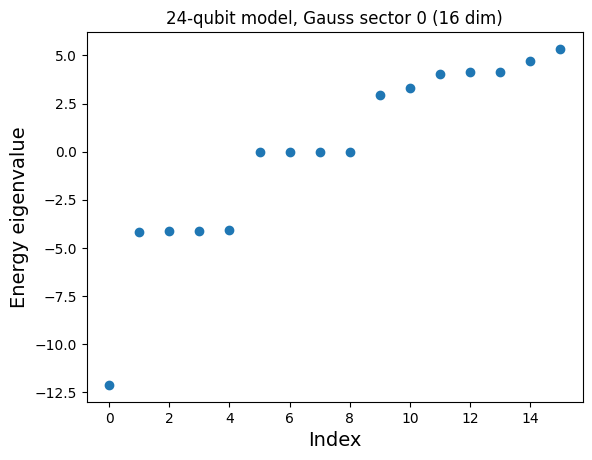

In [13]:
indices = np.arange(evals.shape[0])
plt.scatter(indices, evals)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 0 ({len(subspace)} dim)')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Energy eigenvalue', fontsize=14)

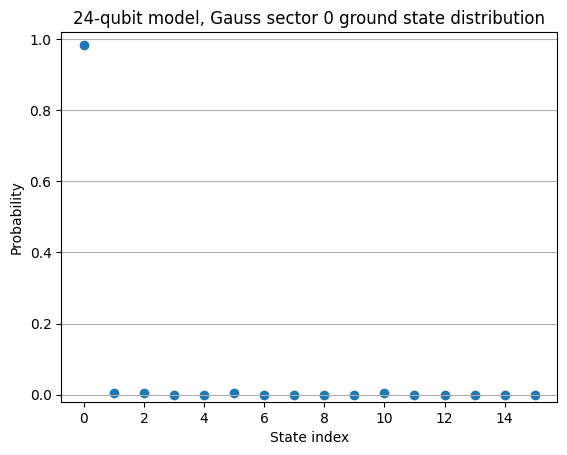

In [14]:
gs_probs = np.square(np.abs(evecs[:, 0]))
plt.scatter(indices, gs_probs)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 0 ground state distribution')
plt.xlabel('State index')
plt.ylabel('Probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

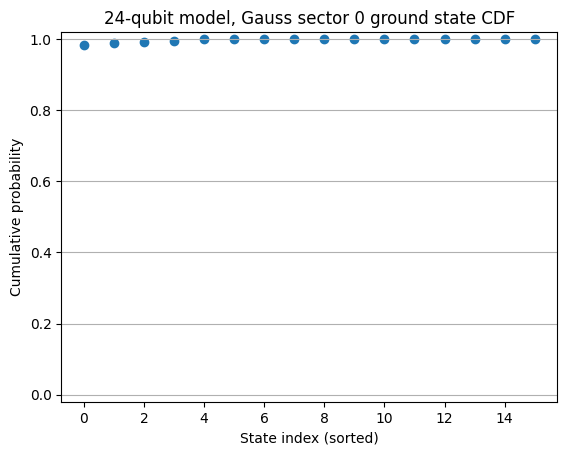

In [15]:
sorted_prob = np.sort(gs_probs)[::-1]
gs_cumul = np.cumsum(sorted_prob)
plt.scatter(indices, gs_cumul)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 0 ground state CDF')
plt.xlabel('State index (sorted)')
plt.ylabel('Cumulative probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

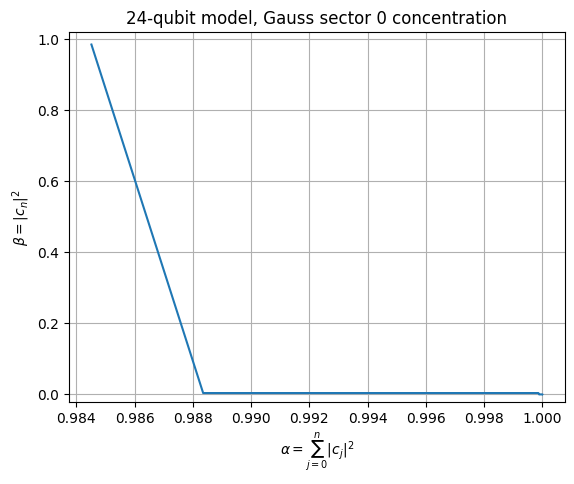

In [16]:
plt.plot(gs_cumul, sorted_prob)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 0 concentration')
plt.xlabel(r'$\alpha = \sum_{j=0}^{n} |c_j|^2$')
plt.ylabel(r'$\beta = |c_n|^2$')
plt.ylim(-0.02, 1.02)
plt.grid(True)

## 4 plaquettes, Gauss sector 1 (two odd vertices)

In [17]:
lattice = RectangularZ2Lattice((3, 3))

hamiltonian = lattice.make_hamiltonian(0.5)

target_parity = [0] * lattice.num_vertices
target_parity[0] = 1
target_parity[-1] = 1
subspace = lattice.charge_subspace(target_parity)
subspace_hamiltonian = subspace_projection(hamiltonian, subspace)
evals, evecs = np.linalg.eigh(subspace_hamiltonian)

Text(0, 0.5, 'Energy eigenvalue')

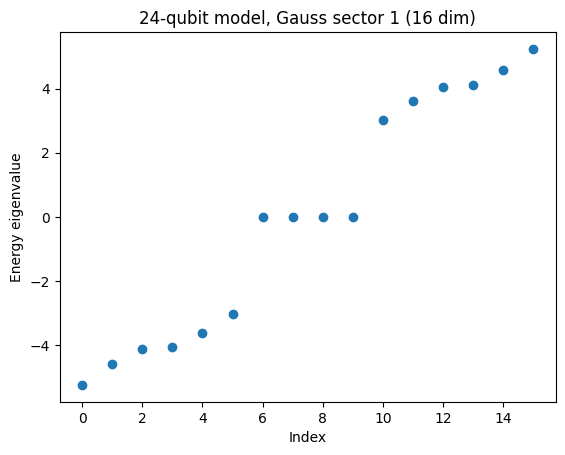

In [18]:
indices = np.arange(evals.shape[0])
plt.scatter(indices, evals)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 1 ({len(subspace)} dim)')
plt.xlabel('Index')
plt.ylabel('Energy eigenvalue')

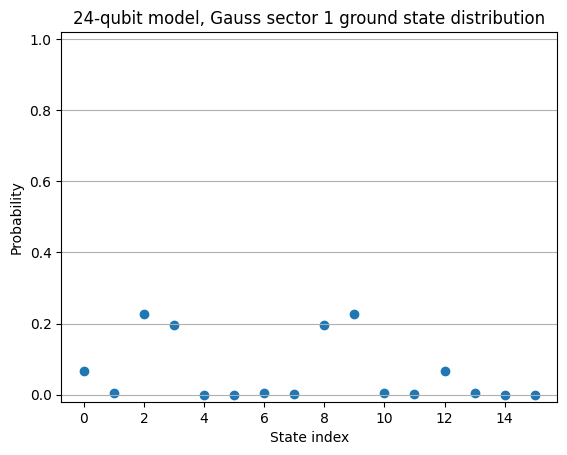

In [19]:
gs_probs = np.square(np.abs(evecs[:, 0]))
plt.scatter(indices, gs_probs)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 1 ground state distribution')
plt.xlabel('State index')
plt.ylabel('Probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

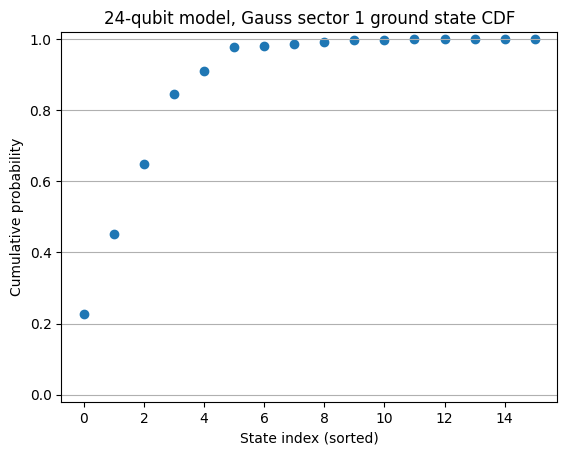

In [20]:
sorted_prob = np.sort(gs_probs)[::-1]
gs_cumul = np.cumsum(sorted_prob)
plt.scatter(indices, gs_cumul)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 1 ground state CDF')
plt.xlabel('State index (sorted)')
plt.ylabel('Cumulative probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

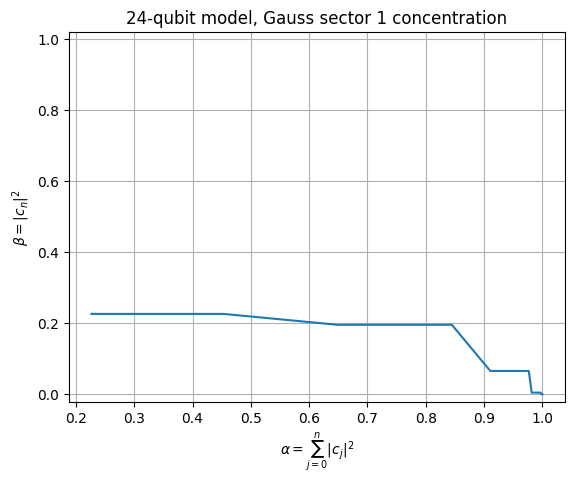

In [21]:
plt.plot(gs_cumul, sorted_prob)
plt.title(f'{lattice.qubit_graph.num_nodes()}-qubit model, Gauss sector 1 concentration')
plt.xlabel(r'$\alpha = \sum_{j=0}^{n} |c_j|^2$')
plt.ylabel(r'$\beta = |c_n|^2$')
plt.ylim(-0.02, 1.02)
plt.grid(True)